# 2 Step Adam Bashforth 
This notebook implements the 2 step Adams Bashforth method for three different population intial value problems.

# Formula
The general 2 step Adams-Bashforth method for the first order differential equation
$$ y^{'} = f(t,y) $$
numerical approximates $y$ the at time point $t_i$ as $w_i$
with the  formula:
$$ w_{i+1}=w_i+\frac{h}{2}\big[3f(t_i,w_i)-f(t_{i-1},w_{i-1})\big],$$
for $i=0,...,N-1$, where 

and $h$ is the stepsize.

To illustrate the method we will apply it to three intial value problems:
## 1. Linear 
Consider the linear population Differential Equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 2. Non-Linear Population Equation 
Consider the non-linear population Differential Equation
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## 3. Non-Linear Population Equation with an oscillation 
Consider the non-linear population Differential Equation with an oscillation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

#### Setting up Libraries

In [1]:
## Library
import numpy as np
import math 
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")

## Discrete Interval
The continuous time $a\leq t \leq b $ is discretised into $N$ points seperated by a constant stepsize
$$ h=\frac{b-a}{N}.$$
Here the interval is $2000\leq t \leq 2020,$ 
$$ h=\frac{2020-2000}{200}=0.1.$$
This gives the 201 discrete points:
$$ t_0=2000, \ t_1=2000.1, \ ... t_{200}=2020. $$
This is generalised to 
$$ t_i=2000+i0.1, \ \ \ i=0,1,...,200.$$
The plot below shows the discrete time steps:

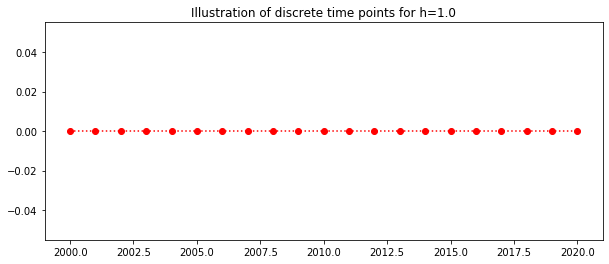

21

In [7]:
### DISCRETE TIME
N=20
t_end=2020.0
t_start=2000.0
h=((t_end-t_start)/N)
t=np.arange(t_start,t_end+h/2,h)

## PLOTS TIME
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.title('Illustration of discrete time points for h=%s'%(h))
plt.show()
len(t)

# 1. Linear Population Equation
## Exact Solution 
The linear population equation
$$ y^{'}=0.1y, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
has a known exact (analytic) solution
$$ y(t)=6e^{0.1(t-2000)}. $$

## Specific 2 step Adams Bashforth
The specific 2 step Adams Bashforth for the linear population equation is:

$$w_{i+1}=w_{i}+\frac{h}{2}\big[3(f(t_i,w_i))-f(t_{i-1},w_{i-1}))\big] $$
where
$$f(t,y)=0.1y,$$

In [8]:
## THIS IS THE RIGHT HANDSIDE OF THE LINEAR POPULATION DIFFERENTIAL 
## EQUATION
def linfun(t,w):
    ftw=0.1*w
    return ftw

this gives

$$ w_{i+1}=w_{i}+\frac{0.1}{2}\big[ 3(0.1w_i)-0.1w_{i-1} \big]$$
for $i=1,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
$$w_0=6.$$

In [9]:
### INSERT METHOD HERE
w=np.zeros(N+1) # a list of 2000+1 zeros
w[0]=6 # INITIAL CONDITION
w[1]=6.06
for i in range(1,N):
    w[i+1]=w[i]+h/2*(3*linfun(t[i],w[i])-linfun(t[i-1],w[i-1]))


## Plotting Results

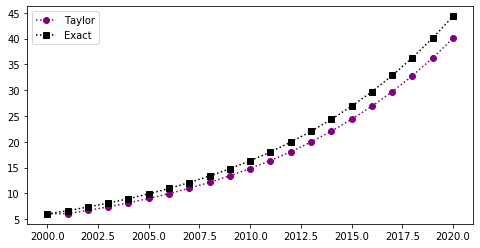

In [10]:
## PLOTTING METHOD
y=6*np.exp(0.1*(t-2000)) # EXACT SOLUTION
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Taylor')
plt.plot(t,y,'s:',color='black',label='Exact')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time, the numerical approximation, $w$,  the exact solution, $y$, and the exact error $|y(t_i)-w_i|$ for the linear population equation:

In [11]:


d = {'time t_i': t, 'Adams w': w,'Exact y(t_i)':y,'Exact Error |w_i-y_i|':np.abs(y-w)}
df = pd.DataFrame(data=d)
df

,time t_i,Adams w,Exact y(t_i),Exact Error |w_i-y_i|
0,2000.0,6.000000,6.000000,0.000000
1,2001.0,6.060000,6.631026,0.571026
2,2002.0,6.669000,7.328417,0.659417
3,2003.0,7.366350,8.099153,0.732803
4,2004.0,8.137852,8.950948,0.813096
5,2005.0,8.990213,9.892328,0.902115
6,2006.0,9.931852,10.932713,1.000861
7,2007.0,10.972119,12.082516,1.110397
8,2008.0,12.121345,13.353246,1.231901
9,2009.0,13.390940,14.757619,1.366678


## 2. Non-Linear Population Equation 
$$ y^{'}=0.2y-0.01y^2, \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$
## Specific 2 step Adams-Bashforth method for the Non-Linear Population Equation
The specific Adams-Bashforth difference equation for the non-linear population equations is:

$$w_{i+1}=w_{i}+\frac{0.1}{2}\big[3(0.2w_{i}-0.01w_{i}^2)-
(0.2w_{i-1}-0.01w_{i-1}^2)\big], $$

for $i=1,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
$$w_0=6.$$
To solve the 2 step method we need a value for $w_1$, here, we will use the approximation from the 2nd order Taylor method (see other notebook),
$$w_1=6.084.$$

In [12]:
def nonlinfun(t,w):
    ftw=0.2*w-0.01*w*w
    return ftw

In [13]:
### INSERT METHOD HERE
w=np.zeros(N+1)
w[0]=6
w[1]=6.084 # FROM THE THE TAYLOR METHOD
for n in range(1,N):
    w[n+1]=w[n]+h/2*(3*nonlinfun(t[n],w[n])-nonlinfun(t[n-1],w[n-1]))

## Results
The plot below shows the numerical approximation, $w$ (circles) for the non-linear population equation:

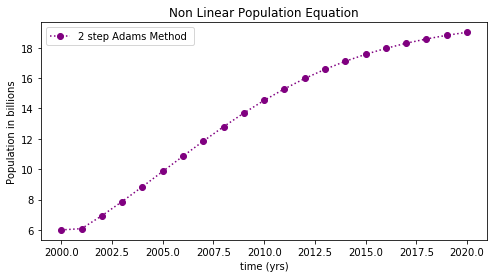

In [14]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='2 step Adams Method ')
plt.title('Non Linear Population Equation')
plt.legend(loc='best')
plt.xlabel('time (yrs)')
plt.ylabel('Population in billions')
plt.show()

## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation:

In [15]:

d = {'time t_i': t, 'Adams approx of non-linear w': w}
df = pd.DataFrame(data=d)
df

,time t_i,Adams approx of non-linear w
0,2000.0,6.000000
1,2001.0,6.084000
2,2002.0,6.933974
3,2003.0,7.869642
4,2004.0,8.848568
5,2005.0,9.851373
6,2006.0,10.857671
7,2007.0,11.846747
8,2008.0,12.799268
9,2009.0,13.698782


## 3. Non-Linear Population Equation with an oscilation 
$$ y^{'}=0.2y-0.01y^2+\sin(2\pi t), \ \ (2000 \leq t \leq 2020), $$
with the initial condition,
$$y(2000)=6.$$

## Specific 2 Step Adams Bashforth for the Non-Linear Population Equation with an oscilation
To write the specific 

$$ w_{i+1}=w_{i}+\frac{0.1}{2} \big[ 3(0.2w_{i}-0.01w_{i}^2+\sin(2\pi t_{i}))- (0.2w_{i-1}-0.01w_{i-1}^2+\sin(2\pi t_{i-1}))\big] $$
            
for $i=1,...,199$, where $w_i$ is the numerical approximation of $y$ at time $t_i$, with step size $h$ and the initial condition
$$w_0=6.$$ As $w_1$ is required for the method but unknown we will use the numerical solution of a one step method to approximate the value. Here, we use the 2nd order Runge Kutta approximation (see [Runge Kutta notebook](https://github.com/john-s-butler-dit/Numerical-Analysis-Python/blob/master/Chapter%2003%20-%20Runge%20Kutta/01_2nd%20Order%20Runge%20Kutta%20Population%20Equations.ipynb) )
$$w_1=6.11.$$

In [13]:
def nonlin_oscfun(t,w):
    ftw=0.2*w-0.01*w*w+np.sin(2*np.math.pi*t)
    return ftw

In [14]:
## INSERT METHOD HERE
w=np.zeros(N+1)
w[0]=6
w[1]=6.11
for n in range(1,N):
    w[n+1]=w[n]+h/2*(3*nonlin_oscfun(t[n],w[n])
                     -nonlin_oscfun(t[n-1],w[n-1]))

## Results
The plot below shows the  numerical approximation, $w$ (circles) for the non-linear population equation:

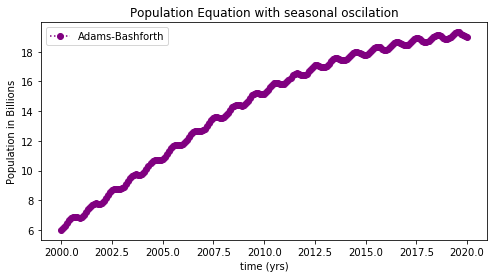

In [15]:
fig = plt.figure(figsize=(8,4))
plt.plot(t,w,'o:',color='purple',label='Adams-Bashforth')
plt.title('Population Equation with seasonal oscilation')
plt.xlabel('time (yrs)')
plt.ylabel('Population in Billions')
plt.legend(loc='best')
plt.show()

## Table
The table below shows the time and the numerical approximation, $w$,  for the non-linear population equation with oscilations:

In [17]:
d = {'time t_i': t, 'Adams Approx w': w}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Approx w
0,2000.0,6.000000
1,2001.0,6.084000
2,2002.0,6.933974
3,2003.0,7.869642
4,2004.0,8.848568
5,2005.0,9.851373
6,2006.0,10.857671
7,2007.0,11.846747
8,2008.0,12.799268
9,2009.0,13.698782
